In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\mn_aj\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('Social Media Ad Data.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Converting the data from column into binary instead of text

In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
data['Gender'] = data['Gender'].map({'Male':1 , 'Female':0})

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


Dropping the column with user ID. User ID will not play any role in deciding the Purchase outcome

In [7]:
data = data.drop(['User ID'], axis = 1)

In [8]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [9]:
data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0
399,0,49,36000,1


__Now we can split the data into training and test data__

In [10]:
X = data.drop(['Purchased'], axis =1)
y = data['Purchased']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [12]:
X_train.head()

,Gender,Age,EstimatedSalary
92,1,26,15000
223,1,60,102000
234,0,38,112000
232,1,40,107000
377,0,42,53000


In [13]:
classifier = DecisionTreeClassifier()

In [14]:
classifier = classifier.fit(X_train, y_train)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
Score = metrics.accuracy_score(y_test, y_pred)

In [17]:
print(Score)

0.8833333333333333


In [18]:
metrics.confusion_matrix(y_test, y_pred)

array([[71,  8],
       [ 6, 35]], dtype=int64)

In [19]:
metrics.f1_score(y_test, y_pred)

0.8333333333333333

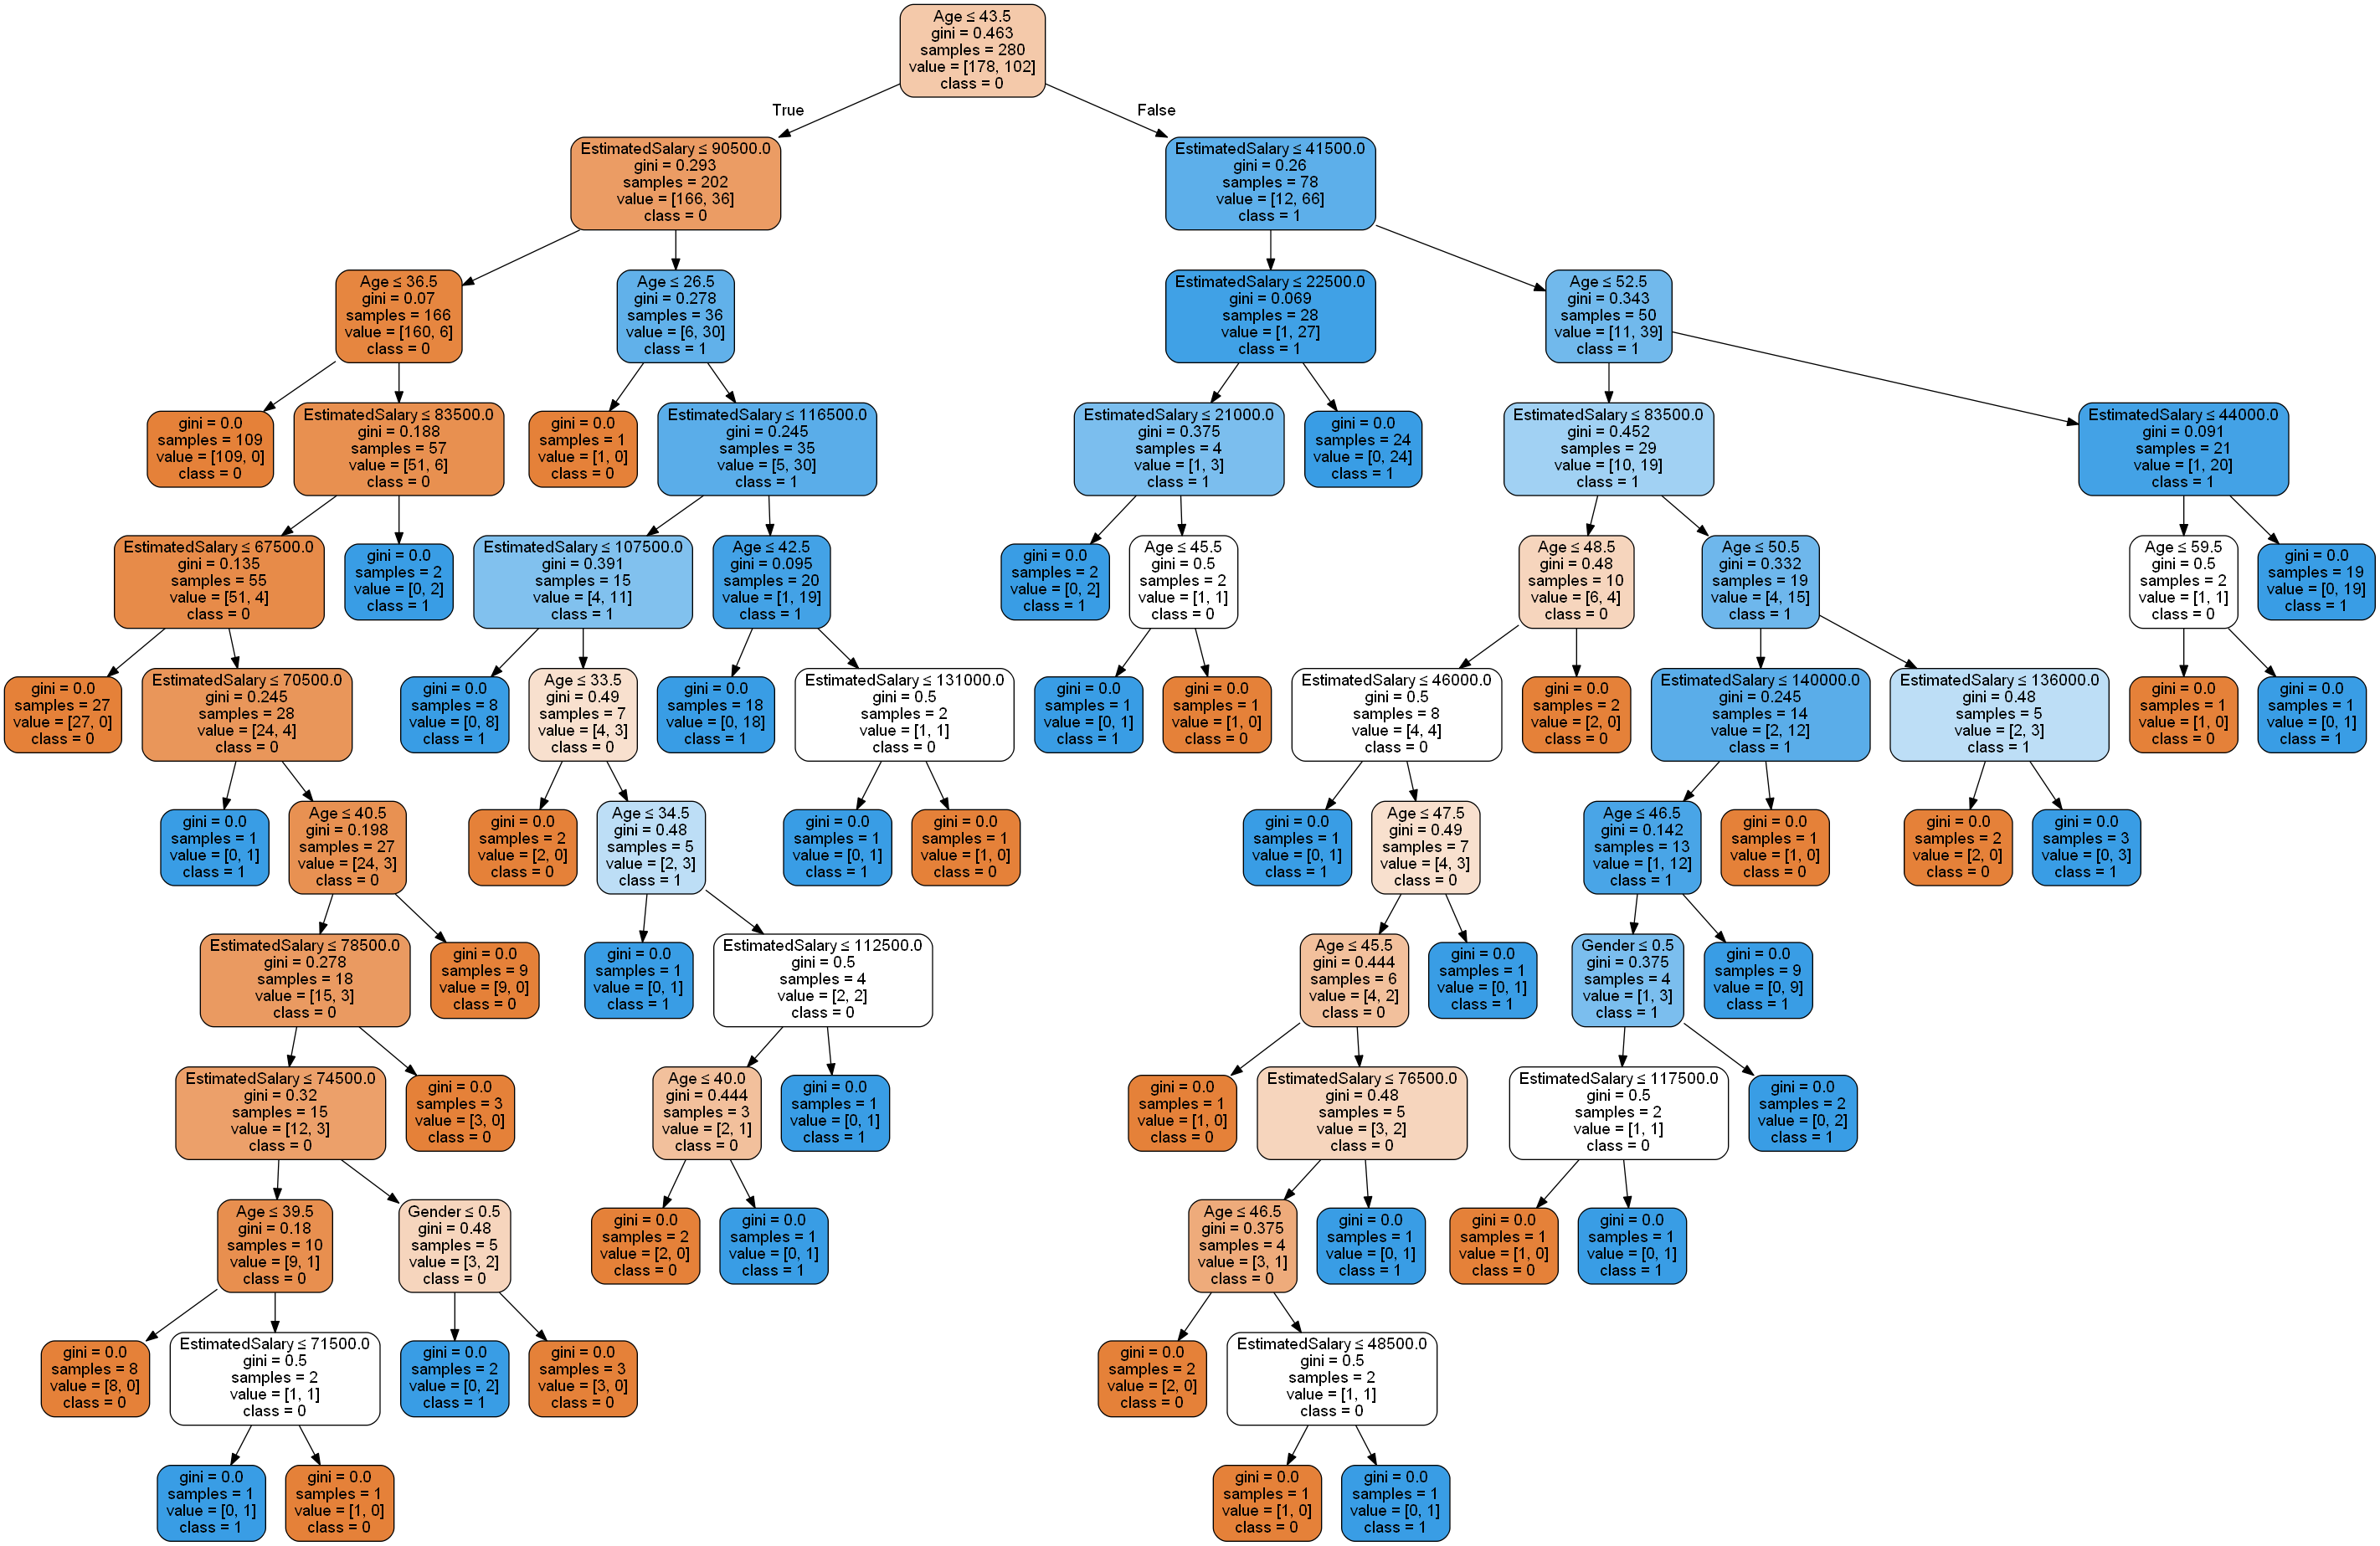

In [20]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Gender','Age','EstimatedSalary'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('image.png')
Image(graph.create_png())